In [1]:
import pandas as pd
import requests
import bs4
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [19]:
url = 'https://www.predictit.org/Home/GetContractListAjax?marketId=1233'
res = requests.get(url)
soup = bs4.BeautifulSoup(res.text)
table = soup.find('tbody')
df_cand = pd.DataFrame([[j.find('a')['href'].split('=')[-1],j.find('h4').text] for j in table.findAll('tr')],columns=['ID','Name']).set_index('ID')
df_cand.index = [j.split('/')[2] for j in df_cand.index]

In [14]:
for t in df_cand.index:
    url = 'https://www.predictit.org/Home/GetChartPriceData?contractId={0}&timespan=24h&_=1442868407873'.format(t)
    res = requests.get(url)
    if t==df_cand.index[0]:
        df = pd.DataFrame(res.json()).rename(columns={'PricePerShare':df_cand.ix[t].values[0]})
    else:
        df = df.merge(pd.DataFrame(res.json()).rename(columns={'PricePerShare':df_cand.ix[t].values[0]}),on='Date')
df['Date'] = df.Date.apply(lambda x: pd.datetime.now() + pd.DateOffset(hours=int(x[:x.find('h')])))
df = df.set_index('Date')

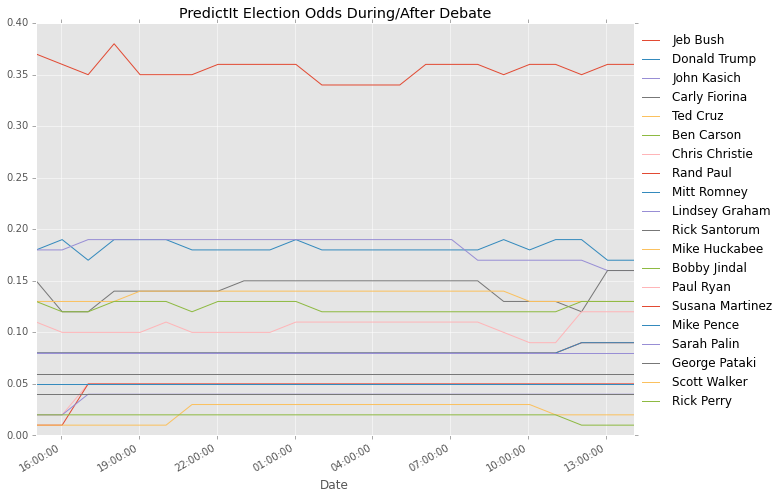

In [15]:
df.plot(figsize=(9,7),title='PredictIt Election Odds During/After Debate')
plt.legend(bbox_to_anchor=(1.25,1)).get_frame().set_facecolor('white')
# plt.axvspan(pd.Timestamp('2015-09-21 15:30:00'),pd.Timestamp('2015-09-21 23:00:00'), alpha=0.2, color='blue')
plt.tight_layout()

In [18]:
table

<tbody>
<tr>
<td>
<div id="outcome">
<div class="outcome">
<a href="/Contract/438/Will-Marco-Rubio-win-the-2016-Republican-presidential-nomination">
<img alt="Marco Rubio" src="https://az620379.vo.msecnd.net/images/Contracts/small_1b2989b5-36f4-40eb-9261-d497684c79a0.jpg" width="75"/>
</a>
</div>
<div class="outcome-title">
<a href="/Contract/438/Will-Marco-Rubio-win-the-2016-Republican-presidential-nomination">
<h4>Marco Rubio</h4>
<p>RUBIO.RNOM16</p>
</a>
</div>
</div>
</td>
<td class="text-center">
<b>38<span style="font-family: helvetica;">¢</span></b>
<span style="margin-left:4px; margin-right:7px; font-size: 12px">NC</span>
</td>
<td class="text-center"><span class="sharesUp">38<span style="font-family: helvetica;">¢</span></span></td>
<td class="text-center"><span class="sharesUp">36<span style="font-family: helvetica;">¢</span></span></td>
<td class="text-center"><span class="sharesDown">64<span style="font-family: helvetica;">¢</span></span></td>
<td class="text-center"><span 